# HMS Capstone - Data Cleaning

In [61]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #1: Read in dataset from .csv

In [62]:
# read in dataset as DataFrame
HMS = pd.read_csv('2016-2017.csv')

In [63]:
# replace Excel NULL's with Python NaN's
HMS = HMS.replace(['#NULL!'], [np.NaN])

## STEP #2: Conduct high-level diagnostics

In [64]:
HMS.head() # all good here
HMS.tail() # identified missing values

,survey,schoolnum,nrweight,responseid,age,sex_birth,gender,gender_text,sexual,sexual_text,...,talk2pro,talk2adv,talk2ofa,talk2ta,talk2sta,talk2dea,talk2oth,talk2noo,viol_victim,ret_confid_y
53755,NaN,NaN,1.43,R_1dnNevp7EG1R8Ht,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
53756,NaN,NaN,1.13,R_30uhu9O9lvYtFG5,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
53757,NaN,NaN,1.73,R_20O11J6JJ29G3G1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
53758,NaN,NaN,0.24,R_3j0Qwrmw8gELHgm,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
53759,NaN,NaN,1.13,R_zeFliYhCqHgUBi1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [65]:
HMS.survey.value_counts(dropna = False) # 1142 missing values

HMS Winter 2017         34795
HMS Fall 2016           12515
HMS Winter 2017 CCMH     5308
NaN                      1142
Name: survey, dtype: int64

In [66]:
HMS.shape # 53760 students x 1581 variables

(53760, 1581)

In [67]:
HMS.info(null_counts = True) # identified dtype issues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53760 entries, 0 to 53759
Columns: 1581 entries, survey to ret_confid_y
dtypes: float64(7), int64(88), object(1486)
memory usage: 648.5+ MB


In [68]:
HMS.describe(include = 'all') # investigated dtype issues

,survey,schoolnum,nrweight,responseid,age,sex_birth,gender,gender_text,sexual,sexual_text,...,talk2pro,talk2adv,talk2ofa,talk2ta,talk2sta,talk2dea,talk2oth,talk2noo,viol_victim,ret_confid_y
count,52618,52618.0,53760.000000,53760,52618.0,52548,52536,314,52345,1691,...,53760.000000,53760.000000,53760.000000,53760.000000,53760.000000,53760.000000,53760.000000,53760.000000,47828,50826
unique,3,55.0,NaN,53760,85.0,6,12,208,12,438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,HMS Winter 2017,49.0,NaN,R_CayJ2kVp6Mr9PBD,21.0,1,2,Agender,1,Pansexual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
freq,34795,4705.0,NaN,1,7473.0,18123,20099,20,39932,324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44951,42367
mean,NaN,NaN,1.028820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.302269,0.280004,0.060789,0.020182,0.117839,0.040513,0.315644,0.058557,NaN,NaN
std,NaN,NaN,0.944637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.459246,0.449005,0.238945,0.140625,0.322420,0.197162,0.464776,0.234795,NaN,NaN
min,NaN,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,0.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,0.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,1.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN


## STEP #3: Clean data

### 1) check for duplicate rows

In [69]:
print('no duplicate rows!') if not any(HMS.duplicated()) else 'duplicates present!'

no duplicate rows!


### 2) Address missing values

In [70]:
# remove students who didn't complete the survey
HMS = HMS[pd.notnull(HMS['survey'])]

### 3) Convert datatypes

In [71]:
# BEFORE: nearly all 'object' datatypes
HMS.dtypes.value_counts()

object     1486
int64        88
float64       7
dtype: int64

In [72]:
# DURING: convert all *non-string* columns to a 'numeric' datatype
HMS = HMS.apply(pd.to_numeric, errors = 'ignore')

In [73]:
# AFTER: nearly all 'float64' datatypes
HMS.dtypes.value_counts()

float64    1434
int64        89
object       58
dtype: int64

## STEP #4: Check for outliers

### survey type

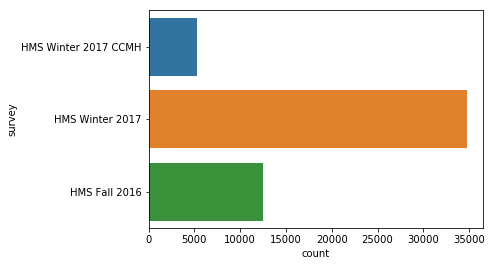

In [74]:
sns.countplot(y = 'survey', data= HMS) # seems normal

### schoolnum respondents

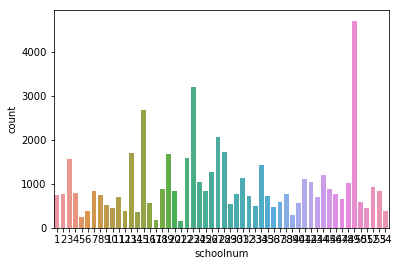

In [75]:
sns.countplot(x = 'schoolnum', data = HMS) # interesting distribution

### age

In [76]:
ageForPlot = pd.to_numeric(HMS.age).dropna()

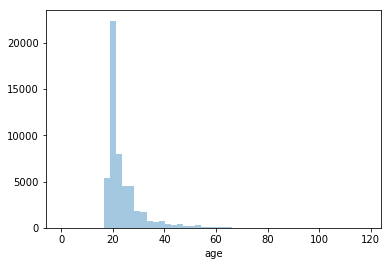

In [77]:
sns.distplot(ageForPlot, kde = False, bins = 50)

In [78]:
len(HMS.age)

52618

In [79]:
len(HMS[HMS['age'] > 30])

6049

In [80]:
ageForPlot.nlargest(n=100)

16317    118.0
3242      99.0
12805     83.0
40130     82.0
40446     80.0
24674     75.0
34664     73.0
8462      72.0
26060     72.0
2526      71.0
16423     71.0
20423     71.0
33778     71.0
36748     71.0
52341     71.0
403       70.0
13566     70.0
15292     70.0
24918     70.0
29341     70.0
40385     70.0
11988     69.0
29477     69.0
50214     69.0
7777      68.0
16630     68.0
17382     68.0
23898     68.0
25928     68.0
12281     67.0
         ...  
43722     64.0
50441     64.0
50664     64.0
51265     64.0
3369      63.0
3641      63.0
5274      63.0
10268     63.0
10473     63.0
11273     63.0
11467     63.0
13557     63.0
15770     63.0
16137     63.0
16577     63.0
24168     63.0
25197     63.0
36533     63.0
41385     63.0
47450     63.0
50103     63.0
50381     63.0
286       62.0
3294      62.0
3783      62.0
5212      62.0
8079      62.0
8743      62.0
10740     62.0
10804     62.0
Name: age, Length: 100, dtype: float64

### sex_birth

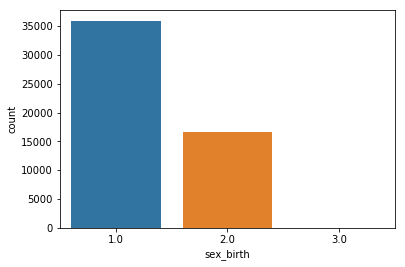

In [81]:
sns.countplot(x = 'sex_birth', data = HMS)

### gender

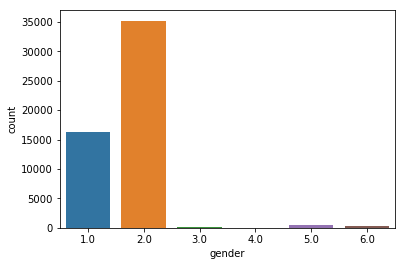

In [82]:
sns.countplot(x = 'gender', data = HMS)

In [83]:
HMS.schoolnum.value_counts(sort = True)

49    4705
23    3208
15    2679
27    2062
28    1732
13    1696
19    1671
22    1590
3     1559
34    1430
26    1257
44    1195
31    1137
41    1111
42    1038
24    1032
48    1010
52     933
45     884
18     878
25     843
20     843
7      833
53     828
4      796
30     769
2      762
38     762
46     758
1      756
8      746
32     731
35     730
11     703
43     692
47     651
50     597
37     590
16     564
40     563
29     531
9      514
33     505
36     466
51     457
10     457
12     388
6      383
54     375
14     358
39     286
5      251
17     177
21     146
Name: schoolnum, dtype: int64

## STEP #5: Organize data 

### 1) Extract required columns

In [84]:
# separate out standard survey modules
HMS_ids = HMS.loc[:, 'schoolnum':'responseid']
HMS_demo = HMS.loc[:, 'age':'disab_3']
HMS_mhstatus = HMS.loc[:, 'diener1':'sleep_np2']
HMS_mhhelp = HMS.loc[:, 'dx_dep1':'pay_mh']

In [85]:
HMS_mhstatus.head()

,diener1,diener2,diener3,diener4,diener5,diener6,diener7,diener8,flourish,phq9_1,...,binge_fr_f,binge_fr_m,binge_fr_o,drug_other1_text,sleep_wk1,sleep_wd1,sleep_wk2,sleep_wd2,sleep_np1,sleep_np2
0,4.0,6.0,3.0,5.0,4.0,4.0,2.0,4.0,32.0,NaN,...,NaN,NaN,NaN,NaN,13.0,14.0,19.0,22.0,1.0,NaN
1,7.0,5.0,5.0,5.0,3.0,6.0,6.0,3.0,40.0,NaN,...,NaN,NaN,NaN,NaN,13.0,15.0,21.0,1.0,1.0,NaN
2,7.0,6.0,7.0,7.0,7.0,6.0,7.0,6.0,53.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,6.0,6.0,6.0,6.0,5.0,5.0,4.0,44.0,NaN,...,NaN,NaN,NaN,xanax,14.0,15.0,23.0,1.0,2.0,3.0
4,7.0,7.0,6.0,7.0,7.0,7.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,16.0,15.0,18.0,1.0,1.0,NaN


### 2) Tidy variable groups

In [86]:
def tidyCatVarGroup(varGroup, categoryName, uniqueID, numMetrics):
    
    # 1) convert categorical variables into dummy/indicator variables
    dummies = pd.get_dummies(varGroup)
    dummies.columns = varGroup.columns
    
    # 2) add unique ID + numerical metrics
    dummies.insert(0, uniqueID.name, uniqueID)
    data = dummies.join(numMetrics.apply(pd.to_numeric))
    
    # 3) melt data from wide to tall
    melted_data = pd.melt(data, id_vars = list(numMetrics.columns.insert(0, uniqueID.name)), var_name = categoryName)
    
    # 4) Filter out all the 0 values (aka: this person doesn't identity with this race) and drop column
    tidy_data = melted_data.loc[melted_data.loc[:,'value'] == 1]
    tidy_data = tidy_data.drop('value', axis = 1)
    
    return tidy_data

In [87]:
# gather uniqueIDs and key-performance-indicators (KPIs)
HMS_IDs = HMS_ids['responseid']
HMS_KPIs = pd.concat([HMS_mhstatus['flourish'], HMS_mhstatus['deprawsc'], HMS_mhstatus['anx_score']], axis=1)

In [88]:
# gather main variable groups
HMS_race = HMS.loc[:, 'race_black':'race_other']
HMS_religion = HMS.loc[:, 'relig_aff_ag':'relig_aff_no']
HMS_degreeType = HMS.loc[:, 'degree_ass':'degree_nd']
HMS_fieldOfStudy = HMS.loc[:, 'field_hum':'field_other']
HMS_activity = HMS.loc[:, 'activ_ac':'activ_none']
HMS_disability = HMS.loc[:, 'disab_1_1':'disab_1_9']

In [89]:
# tidy variable groups
tidy_race = tidyCatVarGroup(HMS_race, 'race', HMS_IDs, HMS_KPIs)
tidy_religion = tidyCatVarGroup(HMS_religion, 'religion', HMS_IDs, HMS_KPIs)
tidy_degreeType = tidyCatVarGroup(HMS_degreeType, 'degreeType', HMS_IDs, HMS_KPIs)
tidy_fieldOfStudy = tidyCatVarGroup(HMS_fieldOfStudy, 'fieldOfStudy', HMS_IDs, HMS_KPIs)
tidy_activity = tidyCatVarGroup(HMS_activity, 'activity', HMS_IDs, HMS_KPIs)
tidy_disability = tidyCatVarGroup(HMS_disability, 'disability', HMS_IDs, HMS_KPIs)

In [90]:
tidy_activity.head()

,responseid,flourish,deprawsc,anx_score,activity
1,R_31yEX4Xz6bZzgUr,40.0,NaN,NaN,activ_ac
12,R_2tbCRbV3H8zRoy0,46.0,NaN,NaN,activ_ac
14,R_w7BW2IVlnRHXcI1,53.0,NaN,NaN,activ_ac
17,R_2CIZ2OyHCiIhFUf,48.0,NaN,NaN,activ_ac
23,R_aVPuYwPez3JrQ8V,56.0,NaN,NaN,activ_ac
